In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

In [5]:
import os 
os.getcwd()

'C:\\Users\\byl93\\KKYU_project'

In [6]:
sea = pd.read_csv("C:/Users/byl93/여기어떼 Dropbox/데이터/바다.csv", encoding="CP949")
mountain = pd.read_csv("C:/Users/byl93/여기어떼 Dropbox/데이터/산.csv", encoding="CP949")
history = pd.read_csv("C:/Users/byl93/여기어떼 Dropbox/데이터/역사.csv", encoding="CP949")
leisure = pd.read_csv("C:/Users/byl93/여기어떼 Dropbox/데이터/체험.csv", encoding="utf-8")

youtube_data = pd.concat([sea, mountain, history, leisure], axis = 0)

In [7]:
youtube_data.head()

,title,tag
0,0,바다
1,"대한민국에 이런 곳이? 바다, 계곡, 예술품 다 있는 대한민국 관광 명소 / YTN...",바다
2,한국이라 믿기힘든 물 맑은 국내바다여행지 10,바다
3,계곡유튜버가 추천하는 경상도계곡 TOP5,바다
4,"한국에서 존재하는 가장 깨끗한 바다, jeju island. Korean water...",바다


In [8]:
youtube_data['tag'].value_counts()

바다    739
문화    731
산     691
레저    650
Name: tag, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(youtube_data['tag'].unique())
print(encoder.classes_)
encoder.transform(['바다', '문화', '산', '레저'])
youtube_data['labeling'] = encoder.transform(youtube_data['tag'])

['레저' '문화' '바다' '산']


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
import numpy as np


def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_data, test_data = split_train_test(youtube_data, 0.3)
print(len(train_data), "train +", len(test_data), "test")

1968 train + 843 test


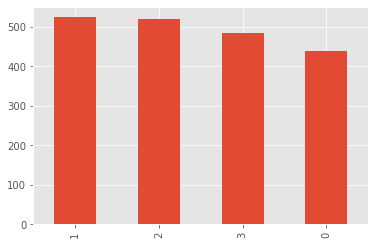

In [13]:
train_data['labeling'].value_counts().plot(kind='bar')

In [14]:
train_data

,title,tag,labeling
627,[여행지 추천] 횡성 미술관 자작나무 숲 둘러보기,산,3
75,국내 여름 휴가지 추천 Top5 [국내여행],바다,2
386,"한강대교, 노들섬, 한국여행, 서울 여행, 관광, 야경, 한강 다리, 철교, 타임랩...",문화,1
223,"[오늘은어디가] 아산 곤충생태원, 장영실과학관, 그린타워 - 아이랑가볼만한곳/아산...",레저,0
354,강릉여행 1박2일 일정 대신 짜드립니다! 볼거리 핫플 경비 완벽 정리 feat.메트...,레저,0
...,...,...,...
584,[국내여행 브이로그 Vlog] 혼자 급 떠난 아산 당일치기 여행 2 아산민속마을 엿...,레저,0
600,"남산봉수대 전통문화공연, 서울여행, 한국여행, 국내여행, 한국관광, 한국투어, 한국...",문화,1
132,"[VLOG] 류핏의 실내서핑 체험 ! (서핑, 가평여행, 청평여행)",레저,0
403,외국인 대상 한국 여행 코스 짜는 팁 - 관광통역안내사,문화,1


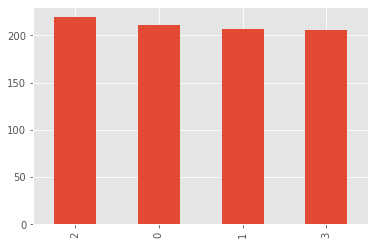

In [15]:
test_data['labeling'].value_counts().plot(kind='bar')

In [16]:
print(train_data.groupby('labeling').size().reset_index(name='count'))
print(test_data.groupby('labeling').size().reset_index(name='count'))

   labeling  count
0         0    439
1         1    524
2         2    520
3         3    485
   labeling  count
0         0    211
1         1    207
2         2    219
3         3    206


In [17]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [18]:
test_data.head()

,title,tag,labeling
670,"제천 계곡 가볼만한곳 금수산 ,정방사,옥순대교 1편#157 귀농귀촌 초보부부",바다,2
97,한국기행 - Korea travel_화산섬기행 3부 귀를 기울이면 그 숲에는_#001,산,3
410,"가족주말체험여행지,속초양양여행지,강원도계곡갈만한곳, 바다와가까운계곡, 민물고기잡기,...",바다,2
361,유자 가이드가 도서관에?! 이 시국에 유럽여행을 떠나는 또다른 방법!,문화,1
193,EBS1 한국기행-숨겨진 계곡,바다,2


In [19]:
from konlpy.tag import *
from tqdm import tqdm

In [20]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [21]:
X_train = []
X_test = []
try:
    for sentence in tqdm(train_data['title']):
        temp_X = []
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)
except:
    pass
try:
    for sentence in tqdm(test_data['title']):
        temp_X = []
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
except:
    pass

100%|███████████████████████████████████████████████████████████████████████████████| 843/843 [00:01<00:00, 785.65it/s]


In [22]:
print(X_test[:3])

[['제천', '계곡', '가보다', '곳', '금수산', ',', '정방사', ',', '옥순대교', '1', '편', '#', '157', '귀농', '귀촌', '초보', '부부'], ['한국', '기행', '-', 'Korea', 'travel', '_', '화산섬', '기행', '3', '부', '귀', '기울이다', '그', '숲', '에는', '_#', '001'], ['가족', '주말', '체험', '여행지', ',', '속초', '양', '양', '여행지', ',', '강원도', '계곡', '갈다', '곳', ',', '바다', '가깝다', '계곡', ',', '민물고기', '잡기', ',', '민물', '낚시', ',', '다슬기', '잡기', '체험']]


제목의 최대 길이 :  52
제목의 평균 길이 :  17.34247967479675


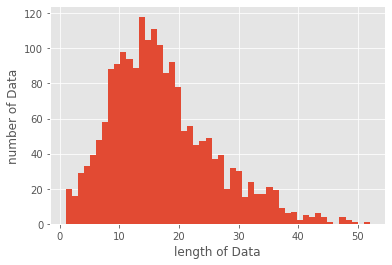

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 50000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [24]:
import numpy as np
y_train = []
y_test = []
for i in range(len(train_data['labeling'])):
    if train_data['labeling'].iloc[i] == 0:
        y_train.append([0, 0, 0, 1])
    elif train_data['labeling'].iloc[i] == 1:
        y_train.append([0, 0, 1, 0])
    elif train_data['labeling'].iloc[i] == 2:
        y_train.append([0, 1, 0, 0])
    elif train_data['labeling'].iloc[i] == 3:
        y_train.append([1, 0, 0, 0])

for i in range(len(test_data['labeling'])):
    if test_data['labeling'].iloc[i] == 0:
        y_test.append([0, 0, 0, 1])
    elif test_data['labeling'].iloc[i] == 1:
        y_test.append([0, 0, 1, 0])
    elif test_data['labeling'].iloc[i] == 2:
        y_test.append([0, 1, 0, 0])
    elif test_data['labeling'].iloc[i] == 3:
        y_test.append([1, 0, 0, 0])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

Using TensorFlow backend.


In [26]:
y_train

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [27]:
print(X_train.shape); print(y_train.shape)

(1968, 20)
(1968, 4)


In [28]:
# model = Sequential()
# model.add(Embedding(max_words, 100))
# model.add(LSTM(256))
# model.add(Dense(4, activation='softmax'))

# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# hist = model.fit(X_train, y_train, epochs=8, batch_size=10, validation_split=0.01)

In [29]:
from tensorflow.keras.models import model_from_json
json_file = open("C:/Users/byl93/OneDrive/바탕 화면/tp/model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights("C:/Users/byl93/OneDrive/바탕 화면/tp/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [34]:
from keras import optimizers
# evaluate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_score = model.evaluate(X_train, y_train, verbose=0)
val_score = model.evaluate(X_test, y_test, verbose=0)
 
print('training loss : ' + str(train_score[0]))
print('validation loss : ' + str(val_score[0]))
 
print('training accuracy : ' + str(train_score[1]))
print('validation accuracy : ' + str(val_score[1]))

UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/StatefulPartitionedCall]] [Op:__inference_test_function_1732]

Function call stack:
test_function -> test_function -> test_function


In [30]:
predict = model.predict(X_test)

UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/StatefulPartitionedCall]] [Op:__inference_predict_function_1105]

Function call stack:
predict_function -> predict_function -> predict_function


In [ ]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [ ]:
for i in range(30):
    print("제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])

제목 :  [국내여행] 당일치기로 떠나기 좋은 대구여행 (8 Places to visit in Daegu, Seoul) /	 원래 라벨 :  3 /	예측한 라벨 :  1
제목 :  vlog : 첫 혼자 여행 브이로그?? / 1박2일 강릉, 동해 여행 / 강문해변, 안목해변, 어달해변 / 김우정 초당짬뽕순두부 / 갱로그 gaenglog /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  등산 서리산, 처음 만난 5월의 철쭉동산 | 잣나무숲 | 걷기 ASMR /	 원래 라벨 :  0 /	예측한 라벨 :  0
제목 :  EBS1 한국기행-숨겨진 계곡 /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  수상레저, 빠지에 가면 있는 양아치들 [김덕배 이야기] /	 원래 라벨 :  3 /	예측한 라벨 :  3
제목 :  한국기행 - Korea travel_숨겨진 계곡 4부 베짱이의 여름나기_#001 /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  동두천 왕방계곡 캠핑금지?/ 경기도 동두천 무료캠핑장 / 왕방계곡 / 배꼽다리 / 수도권 무료캠핑장 / 무료캠핑장 / 국내여행 /	 원래 라벨 :  1 /	예측한 라벨 :  3
제목 :  캠핑장매매 (물건번호 1902호) /	 원래 라벨 :  0 /	예측한 라벨 :  0
제목 :  MT에서 모든 여자와 각각 사랑을 주고 받는 한 남자👫💋   [스푸닝-178화] /	 원래 라벨 :  3 /	예측한 라벨 :  2
제목 :  당일치기 동해여행 /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  강원도 정선에서 만나는 아름다운 국보, 천년의 역사를 품은 정선 정암사 수마노탑-천년의 여행 28회 /	 원래 라벨 :  2 /	예측한 라벨 :  2
제목 :  [안동MBC뉴스] 대한민국 테마여행 10선 홍보 /	 원래 라벨 :  2 /	예측한 라벨 :  2
제목 :  7~8월 국내 전국 축제 모음 [국내여행] /	 원래 라벨 :  3 /	예측한 라벨 :  3
제목 :  [국내여행] 광양 백운산을 오르다 

In [ ]:
'산 바다 문화 체험'

In [ ]:
def String(stred):
    df = pd.DataFrame(data = {'title':[stred]})
    X_test = []
    temp_X = okt.morphs(stred, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)
    X_test = tokenizer.texts_to_sequences(X_test)
    X_test = pad_sequences(X_test, maxlen=max_len)
    predict = model.predict(X_test)
    predict_labels = np.argmax(predict, axis=1)
    original_labels = np.argmax(y_test, axis=1)
    return ("제목: ",stred, " 예측한 라벨: ", predict_labels)

In [ ]:
String('나는 나무가 많고 숲이 보이는 산으로 캠핑을 떠나고 싶어')

('제목: ', '나는 나무가 많고 숲이 보이는 산으로 캠핑을 떠나고 싶어', ' 예측한 라벨: ', array([0]))

In [ ]:
String('나는 가족과 함께 바다로 떠나고 싶어')

('제목: ', '나는 가족과 함께 바다로 떠나고 싶어', ' 예측한 라벨: ', array([2]))

In [ ]:
String('야경이 보이는 해변가로 떠나고 싶어')

('제목: ', '야경이 보이는 해변가로 떠나고 싶어', ' 예측한 라벨: ', array([2]))

In [ ]:
String('아이들과 함께 예쁜 야경이 함께하는 해변가 그리고 파도가 거센 바닷가로 떠나자')

('제목: ',
 '아이들과 함께 예쁜 야경이 함께하는 해변가 그리고 파도가 거센 바닷가로 떠나자',
 ' 예측한 라벨: ',
 array([1]))

In [ ]:
String('한적한 야경이 멋진 해변가 근처 바다 호텔')

('제목: ', '한적한 야경이 멋진 해변가 근처 바다 호텔', ' 예측한 라벨: ', array([1]))

In [ ]:
String('한적한 나무가 우거진 곳에서 시원한 공기를 마시고 싶다')

('제목: ', '한적한 나무가 우거진 곳에서 시원한 공기를 마시고 싶다', ' 예측한 라벨: ', array([0]))

In [ ]:
String('나는 가족과 함께 산으로 떠나고 싶어')

('제목: ', '나는 가족과 함께 산으로 떠나고 싶어', ' 예측한 라벨: ', array([0]))

In [ ]:
String('체험')

('제목: ', '체험', ' 예측한 라벨: ', array([3]))